# Algorithm performance and running time comparison on credit card data (Figures 5,6)

In this notebook we produce plots to compare the performance of the algorithms presented in the paper in terms of utility and running time for instances generated based on real data. The resulting plots are presented in Figures 5,6.

**Required script execution:** cherry.sh

In [1]:
import os
os.chdir("../../")

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import container
plt.style.use('default')
import seaborn as sns
import glob
import json
from lib import utils
from matplotlib.colors import LogNorm
import copy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set_context("paper", font_scale=4)

In [3]:
name="cherry"
datas="credit"
final_df = []
cols = sns.color_palette("Set2",9)
col_dict = {"Non-Strategic": cols[0],
            "Bruteforce": cols[1],
            "Threshold": cols[2],
            "Iterative": cols[3],
            "Iterative (Optimized)": cols[4],
            "DP": cols[5]
           }
linestyles_dict = {"Non-Strategic": "-.",
            "Bruteforce": "-",
            "Threshold": "-",
            "Iterative": "--",
            "Iterative (Optimized)": "-.",
            "DP": ":"
           }
markers_dict = {"Non-Strategic": "v",
            "Bruteforce": "s",
            "Threshold": "^",
            "Iterative": "o",
            "Iterative (Optimized)": "P",
            "DP": "D"
           }

In [4]:
files = glob.glob("./outputs/optimal/{name}_thres_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))

df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "alpha", "sparsity", "time", "pi", "strategic_threshold_br"], var_name="algorithm", value_name="utility"))

In [5]:
files = glob.glob("./outputs/optimal/{name}_iterative*_data_{datas}*_config.json".format(name=name, datas=datas))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "alpha", "components", "sparsity", "time", "parallel", "iterations", "pi", "strategic_br", "pi_non_strategic", "non_strategic_br", "strategic_deter_br", "pi_strategic_deter", "strategic_deter", "split_components"], var_name="algorithm", value_name="utility"))

In [6]:
df = pd.concat(final_df)
df['algorithm'][df['algorithm']=="strategic"] = df['algorithm'][df['algorithm']=="strategic"]+df['split_components'][df['algorithm']=="strategic"].astype(str)

In [7]:
df['algorithm'] = df['algorithm'].str.replace("non_strategic", "Non-Strategic")
df['algorithm'] = df['algorithm'].str.replace("strategic_threshold", "Threshold")
df['algorithm'] = df['algorithm'].str.replace("strategicTrue", "Iterative (Optimized)")
df['algorithm'] = df['algorithm'].str.replace("strategicFalse", "Iterative")

In [8]:
df['algorithm'].unique()

array(['Threshold', 'Iterative (Optimized)', 'Iterative', 'Non-Strategic'],
      dtype=object)

In [9]:
df['alpha'] = (1/df['alpha']*100).astype(int)

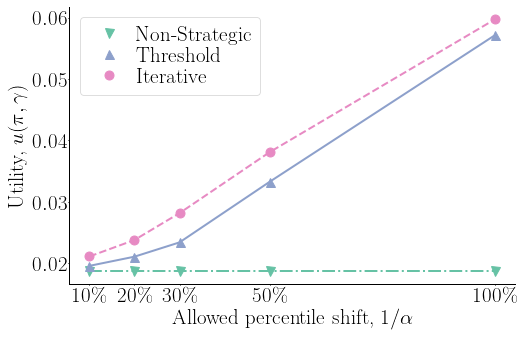

In [11]:
utils.latexify(8,5, font_scale=3.0)
ax = plt.gca()
df.sort_values(["algorithm"], inplace=True)
algorithms=["Non-Strategic", "Threshold", "Iterative"]
colors = [col_dict[alg] for alg in algorithms]
markers = [markers_dict[alg] for alg in algorithms]
linestyles = [linestyles_dict[alg] for alg in algorithms]

lines={}
alphas=df['alpha'].unique()
for alg in algorithms:
    lines[alg]=[]
    for x_val in alphas:
        line_l=pd.DataFrame(df[(df['algorithm']==alg) & (df['alpha']==x_val)], columns=['utility']).values.tolist()
        lines[alg].append((x_val,np.mean(line_l),np.std(line_l)))

ax=plt.subplot(111)
new_handles = []
for alg in algorithms:
    line_sorted=sorted(lines[alg], key=lambda x:x[0])
    x_vals=[x[0] for x in line_sorted]
    y_vals=[x[1] for x in line_sorted]
    h, = ax.plot(x_vals, y_vals, linestyle=linestyles_dict[alg], marker=markers_dict[alg], label=alg, markersize=9, color=col_dict[alg], linewidth=2)
    new_handles.append(copy.copy(h))

for ind, alg in enumerate(algorithms):
    new_handles[ind].set_color('w')
    new_handles[ind].set_markerfacecolor(col_dict[alg])
    new_handles[ind].set_markeredgecolor(col_dict[alg])
    new_handles[ind].set_markersize(9)
    new_handles[ind].set_markeredgewidth(1)

plt.legend(handles=new_handles, shadow=None, loc=2, labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Utility, $u(\\pi,\\gamma)$")
plt.xlabel("Allowed percentile shift, $1/\\alpha$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
temp = plt.xticks(ticks=x_vals, labels=[str(x)+'\%' for x in x_vals])
plt.savefig("./figures/optimal/{name}_{datas}_u.pdf".format(name=name, datas=datas),bbox_inches='tight', )

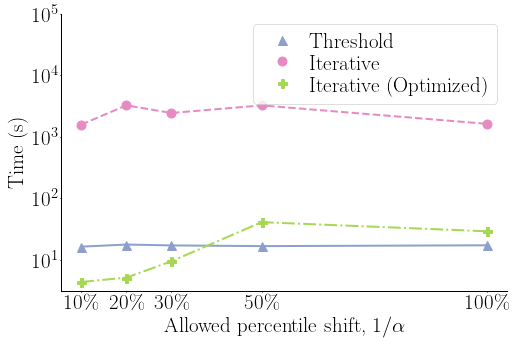

In [12]:
utils.latexify(8,5, font_scale=3.0)
lines={}
algorithms=["Threshold", "Iterative", "Iterative (Optimized)"]
alphas=df['alpha'].unique()
for alg in algorithms:
    lines[alg]=[]
    for x_val in alphas:
        line_l=pd.DataFrame(df[(df['algorithm']==alg) & (df['alpha']==x_val)], columns=['time']).values.tolist()
        lines[alg].append((x_val,np.mean(line_l),np.std(line_l)))

ax=plt.subplot(111)
new_handles = []
for alg in algorithms:
    line_sorted=sorted(lines[alg], key=lambda x:x[0])
    x_vals=[x[0] for x in line_sorted]
    y_vals=[x[1] for x in line_sorted]
    h, = ax.plot(x_vals, y_vals, linestyle=linestyles_dict[alg], marker=markers_dict[alg], label=alg, markersize=9, color=col_dict[alg], linewidth=2)
    new_handles.append(copy.copy(h))

for ind, alg in enumerate(algorithms):
    new_handles[ind].set_color('w')
    new_handles[ind].set_markerfacecolor(col_dict[alg])
    new_handles[ind].set_markeredgecolor(col_dict[alg])
    new_handles[ind].set_markersize(9)
    new_handles[ind].set_markeredgewidth(1)

plt.legend(handles=new_handles, shadow=None, loc=1, labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Time (s)")
plt.xlabel("Allowed percentile shift, $1/\\alpha$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
temp = plt.xticks(ticks=x_vals, labels=[str(x)+'\%' for x in x_vals])
plt.yscale('log') 
top_lim = 100000
plt.ylim(top=top_lim)
plt.savefig("./figures/optimal/{name}_{datas}_t.pdf".format(name=name, datas=datas),bbox_inches='tight', )

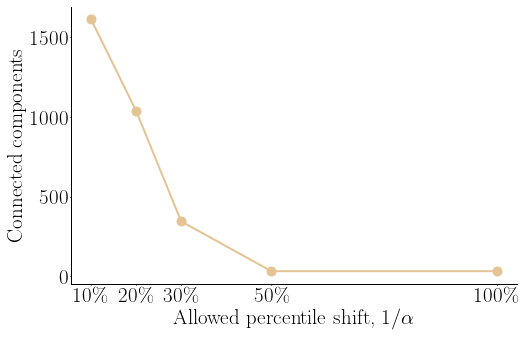

In [13]:
utils.latexify(8,5, font_scale=3.0)
lines={}
algorithms=["Iterative (Optimized)"]
alphas=df['alpha'].unique()
for alg in algorithms:
    lines[alg]=[]
    for x_val in alphas:
        line_l=pd.DataFrame(df[(df['algorithm']==alg) & (df['alpha']==x_val)], columns=['components']).values.tolist()
        lines[alg].append((x_val,np.mean(line_l),np.std(line_l)))

ax=plt.subplot(111)
for alg in algorithms:
    line_sorted=sorted(lines[alg], key=lambda x:x[0])
    x_vals=[x[0] for x in line_sorted]
    y_vals=[x[1] for x in line_sorted]
    ax.plot(x_vals, y_vals, linestyle='-', marker='o', markersize=9, color=cols[6], linewidth=2)

plt.ylabel("Connected components")
# plt.ylabel("Subproblems")
plt.xlabel("Allowed percentile shift, $1/\\alpha$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
temp = plt.xticks(ticks=x_vals, labels=[str(x)+'\%' for x in x_vals])
plt.savefig("./figures/optimal/{name}_{datas}_comp.pdf".format(name=name, datas=datas),bbox_inches='tight', )

In [15]:
# Read data
px = pd.read_csv('data/processed/'+datas+'_px.csv', index_col=0, header=0)
u = pd.read_csv('data/processed/'+datas+'_pyx.csv', index_col=0, names=["ID", "Probability"], header=0, dtype={'Probability': np.float})
vecs = pd.read_csv('data/processed/'+datas+'_vectors.csv', index_col=0, header=0)

In [16]:
merged = pd.merge(px, u, left_index=True, right_index=True)
merged = merged.sort_values(by=['Probability'])
merged['Population']= merged['Population'].cumsum()-merged['Population']

In [17]:
limits=[0]
for per in np.arange(0.1, 1.0, 0.1):
    limits.append(merged['Probability'].loc[(merged['Population']>=per).idxmax()])

limits.append(1)

In [18]:
util_class = np.zeros(u.size, dtype=int)
for ind,lower in enumerate(limits[:-1]):
    indexes=u[(u['Probability']>=limits[ind]) & (u['Probability']<limits[ind+1])].index
    for i in indexes:
        util_class[i]=ind

u['Class']=list(util_class)

In [19]:
fi = "./outputs/optimal/{name}_iterative_data_{datas}_a_1_seed_1_config.json".format(name=name, datas=datas)
with open(fi,"r") as file:
    obj = json.load(file)
    non_strategic_br = obj['non_strategic_br']
    movement_matrix = np.zeros((10, 10))
    for s, t in non_strategic_br.items():
        source = int(s)
        target = int(t)
        movement_matrix[int(u.loc[source]['Class']),int(u.loc[target]['Class'])] += px.loc[source]['Population']

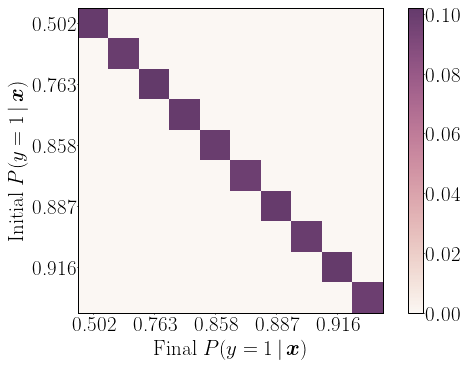

In [20]:
utils.latexify(8.8,5.5, font_scale=3.0)
my_cmap = sns.cubehelix_palette(light=0.97, dark=0.3, as_cmap=True)
plt.imshow(movement_matrix, cmap=my_cmap)
lab = range(0,10,2)
plt.xticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.yticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.xlabel('Final '+r'$P(y=1\,|\,\bm{x})$')
plt.ylabel('Initial '+r'$P(y=1\,|\,\bm{x})$')
plt.colorbar()
plt.savefig("./figures/optimal/movement_{datas}_non_strategic.pdf".format(datas=datas),bbox_inches='tight', )

Set the $\alpha$ parameter to be used for plotting.

Values used: Non-strategic, 10, 3.3, 1

In [21]:
alpha = 1

In [22]:
fi = "./outputs/optimal/{name}_iterative_data_{datas}_a_{alpha}_seed_1_config.json".format(name=name, datas=datas, alpha=alpha)
with open(fi,"r") as file:
    obj = json.load(file)
    non_strategic_br = obj['strategic_br']
    movement_matrix = np.zeros((10, 10))
    for s, t in non_strategic_br.items():
        source = int(s)
        target = int(t)
        movement_matrix[int(u.loc[source]['Class']),int(u.loc[target]['Class'])] += px.loc[source]['Population']

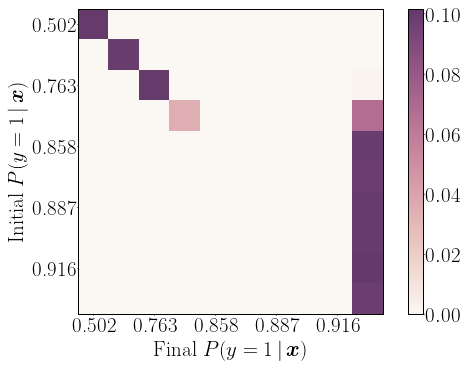

In [23]:
utils.latexify(8.8,5.5, font_scale=3.0)
my_cmap = sns.cubehelix_palette(light=0.97, dark=0.3, as_cmap=True)
plt.imshow(movement_matrix, cmap=my_cmap)
lab = range(0,10,2)
plt.xticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.yticks(ticks=lab,labels=[str(np.around(limits[l+1],3)) for l in lab])
plt.xlabel('Final '+r'$P(y=1\,|\,\bm{x})$')
plt.ylabel('Initial '+r'$P(y=1\,|\,\bm{x})$')
plt.colorbar()
plt.savefig("./figures/optimal/movement_{datas}_alpha_{alpha}.pdf".format(datas=datas, alpha=str(alpha).replace('.','_')),bbox_inches='tight', )